# Applied Machine Learning
## Practical Assignment 1

In [479]:
Names: ['Alex Hakvoort', 'Sebastiaan van Dijk'] 
Studentnumbers: ['12488674', '12400319']

### Important Notes:
1. Submit through **Canvas** before 11:59pm on Wednesday, April 22, 2020.
2. No late homework will be accepted.
3. This is a **group-of-two** assignment; hence choose **one** partner to work with.
4. The submitted file should be in ipynb format
5. The assignment is worth 10 points
6. For questions, please use the discussion part of canvas (English only!)

### Software:
We will be using Python programming language throughout this course. Further we will be using:
+ IPython Notebooks (as an environment)
+ Numpy
+ Pandas
+ Scikit-learn


### Background:

This practical assignment will be covering linear regression and evaluation. For the assignment, please download a [dataset](https://drive.google.com/open?id=1rESPdl7CUfvgkA44YQ42pcOaMOCGN8B6) containing demographic information and crime statistics (in a given year) for some cities in the US.

Assume that for certain cities there is missing information about crimes, so we would like to learn how to estimate the number of non-violent crimes based on characteristics of the city (demographics, location etc).

In [480]:
import os
import sys

import numpy as np
import pandas as pd
import sklearn
from nose.tools import assert_count_equal, assert_equal
from numpy.testing import *
from pandas.testing import assert_frame_equal
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


## Part 1: Loading the data into a Pandas Data Frame [0.5 pts]

The descriptions of the columns of the dataset can be found here:

**pop**: population

**pctUrban**: percentage of people living in areas classified as urban

**medIncome**: Median Income

**pct12-29**: percentage of population that is 12-21 in age

**pct65up**: percentage of population that is 65 and over in age

**pctPoverty**: percentage of people under the poverty level

**pctAllDivorc**: percentage of population who are divorced

**pctUnemploy**: percentage of people 16 and over, in the labor force, and unemployed

**perHoush**: mean persons per household

**pctHousOccup**: percent of housing occupied

**persHomeless**: number of homeless people

**persEmergShelt**: number of people in homeless shelters

**nonViolPerPop**: total number of non-violent crimes per 100K popuation

**State**: the state in which this town/city is located

**countyCode**: the code number of the county of the state this town/city is located



### Question 1a:
Load the data into a Pandas DataFrame. At this point, make sure that you only load the following columns: 

`'pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 'pctPoverty', 'pctAllDivorc', 'pctUnemploy', 'perHoush', 'pctHousOccup', 'persHomeless', 'persEmergShelt', 'nonViolPerPop'`


In [481]:
csv_path = 'crime_data.csv'


In [482]:


### BEGIN SOLUTION

# Load the dataset
crime_data = pd.read_csv('./crime_data.csv',sep=",", header = 0, 
                 usecols=['pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 'pctPoverty', 'pctAllDivorc', 'pctUnemploy', 'perHoush', 'pctHousOccup', 
                          'persHomeless', 'persEmergShelt', 'nonViolPerPop'])

### END SOLUTION

print(crime_data.shape)
crime_data.head()

(949, 13)


,perHoush,pct12-29,pct65up,pctUrban,pctPoverty,pctUnemploy,pctAllDivorc,pctHousOccup,persEmergShelt,persHomeless,nonViolPerPop,medIncome,pop
0,3.10,21.44,11.33,100.0,1.96,2.70,4.47,98.37,11,0,1394.59,75122.0,11980.0
1,2.82,21.30,17.18,100.0,3.98,2.43,5.42,97.15,0,0,1955.95,NaN,23123.0
2,2.76,40.53,12.65,0.0,29.99,9.08,9.73,92.45,2,0,9988.79,NaN,NaN
3,2.60,27.41,14.42,100.0,4.01,4.85,7.64,95.11,0,0,1890.88,42805.0,28700.0
4,2.46,35.16,8.58,100.0,13.68,4.18,8.64,95.07,125,15,4747.58,NaN,74111.0


### Question 1b:
We want to predict the number of crimes. Identify the features X and the target variable Y, and turn the X and Y DataFrames into Numpy arrays.


In [483]:
### BEGIN SOLUTION

X = crime_data[['pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 'pctPoverty', 'pctAllDivorc', 'pctUnemploy', 
        'perHoush', 'pctHousOccup', 'persHomeless', 'persEmergShelt']].values
Y = crime_data['nonViolPerPop'].values.reshape(-1,1)

### END SOLUTION


## Part 2: Split the data into a training set and a test set [0.5 pts]
### Question 2:
Split the data into a training and a test set. Use a  70%-30% split.  
Print the number of examples in the training set and the test set.

In [484]:
X_train = 'Replace this string with the correct answer'
X_test = 'Replace this string with the correct answer'
Y_train = 'Replace this string with the correct answer'
Y_test = 'Replace this string with the correct answer'

### BEGIN SOLUTION

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

### END SOLUTION
print(X_train[:5])
print(X_test[:5])

[[7.63710e+04 9.46900e+01 4.07040e+04 2.44800e+01 1.44200e+01 4.92000e+00
  7.66000e+00 5.01000e+00 2.79000e+00 7.67300e+01 0.00000e+00 9.60000e+01]
 [1.82044e+05 1.00000e+02 1.97790e+04 2.96300e+01 1.20100e+01 2.65300e+01
  1.75300e+01 1.03900e+01 2.51000e+00 9.04200e+01 5.00000e+00 4.06000e+02]
 [1.02270e+04 0.00000e+00 2.88920e+04 2.42400e+01 1.35800e+01 7.95000e+00
  9.24000e+00 3.60000e+00 2.57000e+00 9.78600e+01 0.00000e+00 0.00000e+00]
 [3.51840e+04 1.00000e+02         nan 2.00900e+01 1.14900e+01 1.15000e+00
  4.16000e+00 2.25000e+00 2.95000e+00 9.74300e+01 0.00000e+00 0.00000e+00]
 [1.60640e+04 1.00000e+02         nan 2.38700e+01 1.42000e+01 5.71000e+00
  1.07300e+01 3.93000e+00 2.52000e+00 9.65300e+01 0.00000e+00 1.90000e+01]]
[[2.6542e+04 8.6820e+01 3.2596e+04 2.4090e+01 1.5500e+01 6.7300e+00
  8.7500e+00 5.1000e+00 2.6600e+00 9.6250e+01 0.0000e+00 0.0000e+00]
 [3.0954e+04 1.0000e+02 3.7856e+04 2.5430e+01 1.0450e+01 6.2200e+00
  9.7500e+00 4.1700e+00 2.6900e+00 9.4850e+01 0.0

## Part 3: Linear Regression [2 pts]

**Missing Data**: Often the data you are considering is incomplete. For example in some city, the number of homeless people might be unknown. In this case, if you look into the datasets you will find the value *NaN*. This is not a real value, hence Linear Regression cannot handle it.

The question is how can we handle missing data. There are many ways to do so, some more sophisticated than others. Here we will use a simple approach. This simple approach fills in the missing values, i.e. replaces the *NaN* by the median of the corresponding feature. E.g. if there is a *NaN* value for the population in one city, this *NaN* value will be replaced by the median number of the population in all other cities in the data.

In [485]:
from sklearn.impute import SimpleImputer
# Fill in the missing data in the dataset (i.e. replace NaN values) 
imp_median_X = SimpleImputer(missing_values=np.nan, strategy='median').fit(X_train)
X_train = imp_median_X.transform(X_train)
X_test = imp_median_X.transform(X_test)

imp_median_Y = SimpleImputer(missing_values=np.nan, strategy='median').fit(Y_train)
Y_train = imp_median_Y.transform(Y_train)
Y_test = imp_median_Y.transform(Y_test)

### Question 3a:
Train a linear regression model

In [486]:
### BEGIN SOLUTION
def train_linregmodel(X, Y):
    lr = LinearRegression().fit(X, Y)    
    return lr
### END SOLUTION
    

lr = train_linregmodel(X_train,Y_train)
print(lr.coef_)
# print("lr.intercept_: {}".format(lr.intercept_))
# print("R^2_train = %f" % lr.score(X_train, Y_train))
# print("R^2_test = %f" % lr.score(X_test,Y_test))

[[-2.78531897e-03  9.48309549e+00 -2.93683465e-03 -3.57523539e+01
   3.07080621e+01  1.45924641e+02  3.04383597e+02 -1.12296606e+02
   5.21315760e+02 -5.20501987e+01 -5.49403705e+00  3.51881470e+00]]


### Question 3b:
Compare the importance of features based on the parameters $\theta$ of the model. 

1. Which are the top-5 most important features for the predicting the number of crimes per capita?   
2. Out of those, which correlate positively and which negatively with the number of crimes in a region?

In [487]:
coefficients = pd.Series(lr.coef_[0], index=['pop', 'pctUrban', 'medIncome', 'pct12-29', 'pct65up', 
                                                'pctPoverty', 'pctAllDivorc', 'pctUnemploy', 'perHoush',
                                                'pctHousOccup', 'persHomeless', 'persEmergShelt'])
coefficientsABS = coefficients.abs()
print(coefficients)
top5 = coefficientsABS.nlargest(n=5).index.tolist()
print(top5)

### BEGIN SOLUTION


### END SOLUTION

pop                -0.002785
pctUrban            9.483095
medIncome          -0.002937
pct12-29          -35.752354
pct65up            30.708062
pctPoverty        145.924641
pctAllDivorc      304.383597
pctUnemploy      -112.296606
perHoush          521.315760
pctHousOccup      -52.050199
persHomeless       -5.494037
persEmergShelt      3.518815
dtype: float64
['perHoush', 'pctAllDivorc', 'pctPoverty', 'pctUnemploy', 'pctHousOccup']


<span style="color:blue">**1:'perHoush', 'pctAllDivorc', 'pctPoverty', 'pctUnemploy', 'pctHousOccup' are the most important features for predicting the number of crimes per capita. 2:
Out of those, 'pctUnemploy' and 'pctHousOccup' correlate negatively with the number of crimes in a region. The rest of the features correlate positively.**</span>

### Question 3c:

Compute the Mean Absolute Error and Root Mean Squared Error, do this without using the scikit-learn API for these values.



In [488]:
def rmse(y_true, y_pred):
    ### BEGIN SOLUTION
    MSE = 0
    n = 0
    for yt, yp in zip(y_true, y_pred):
        MSE += (yp[0] - yt[0])**2
        n += 1
    RMSE = (MSE/n)**0.5
    
    ### END SOLUTION
    return RMSE 

In [489]:
def mae(y_true, y_pred):
    ### BEGIN SOLUTION
    MAE = 0
    n = 0
    for yt, yp in zip(y_true, y_pred):
        MAE += abs(yp[0] - yt[0])
        n += 1
    
    ### END SOLUTION
    return (MAE/n)

### Question 3d:
MAE is an L1 error, while RMSE is an L2 error (L2 errors are based on the squared errors of each prediction in contrast to L1). Consider a scenario where having a relatively small deviation from the true value is ok, but you would really like to avoid making large errors in predictions. Which of those two metrics would you choose to evaluate your models? Explain.

<span style="color:blue">**When predicting the amount of infections in a virus outbreak, you want to minimize the deviation from the truth value in order to take good action. When you think that there are 100 infections and in reality there are 110, this is a small error which should not have a big impact on the actions to be taken. If the propagation rate for the virus is 3 this means that every infected person is probably going to infect 3 more people. If we say that the virus will be transmittable one week after infection. This means that when you want to make a prediction of how the disease will spread after a months time, this mistake of 10 would result in a wrong prediction of 810 people (10 x 3^4). This error will only increase the further the prediction will go after three months (let's say twelve week) it will be (10 x 3^12) = 5314410. 
So in this case, the error at the start of 10 infections is not a good situation however it’s acceptable/okay. However, it will lead to large errors in predictions that you want to avoid.

In order to reduce the large errors in predictions, we want to use RMSE (L2 error) Because : ‘L2 errors are based on the squared errors of each prediction in contrast to L1’. In the case of MAE the impact of the error is linear with the size of the error, while for the RMSE, errors worsen the outcome of the RMSE exponentially, making large errors very impactful.**</span>


## Part 4. Adding features [2 pts]
1. Add a number of features by including polynomials and interactions of different degree
2. Train and test the different linear regression models over the data
3. Test whether increasing the complexity of the model overfits the data

### Question 4a
Implement a function that constructs additional features by considering the polynomials of the original features along with their interactions. Degree is the degree of the polynomial.  
Consider the original dataset that was loaded into Pandas, and then turned into a Numpy array from Part 1.

In [490]:
def polynomial(X, degree):
    
    ### BEGIN SOLUTION
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    ### END SOLUTION
    return X_poly

### Question 4b:
Write your conclusions regarding the performance of the models of increasing complexity

For degree 1, the RMSE for the training set is 1798.4014153708256 and for the test set is 1825.609107683881
For degree 1, the R^2 score for the training set is 0.438453051958404 and for the test set is 0.3279896140843841
For degree 2, the RMSE for the training set is 1561.0069015556755 and for the test set is 10322.795046215322
For degree 2, the R^2 score for the training set is 0.5769200481839324 and for the test set is -20.48597208603745
For degree 3, the RMSE for the training set is 1656.246134447975 and for the test set is 879742.9111023739
For degree 3, the R^2 score for the training set is 0.5237197694212452 and for the test set is -156051.93807680055
For degree 4, the RMSE for the training set is 2003.95192399816 and for the test set is 10148520.466712318
For degree 4, the R^2 score for the training set is 0.30275180840990734 and for the test set is -20766621.17685422
For degree 5, the RMSE for the training set is 2615.429622583414 and for the test set is 23170511.08822697
For d

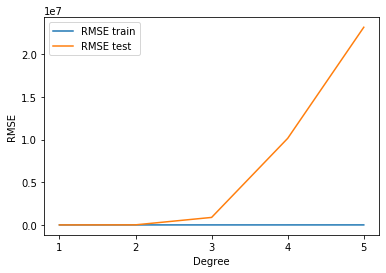

In [491]:
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

RMSE_scores_train = []
RMSE_scores_test = []
# Generate polynomial dataset (both training and test) of degrees 1, 2, 3, 4, 5
for power in [1, 2, 3, 4, 5]:
    X_train_poly = polynomial(X_train, power)
    X_test_poly = polynomial(X_test, power)
# Scale all features using the RobustScaler
    scaler = RobustScaler().fit(X_train_poly)
    X_train_scaled = scaler.transform(X_train_poly)
    X_test_scaled = scaler.transform(X_test_poly)

    lr = LinearRegression().fit(X_train_scaled, Y_train)
    prediction_train = lr.predict(X_train_scaled)
    prediction_test = lr.predict(X_test_scaled)
# Compute and print RMSE using your code above on the training set and on the test set
    RMSE_train = rmse(Y_train, prediction_train)
    RMSE_test = rmse(Y_test, prediction_test)
    print("For degree {}, the RMSE for the training set is {} and for the test set is {}".format(power, RMSE_train, RMSE_test))
# Compute and print R^2 on the training set and on the test set
    r2_train = r2_score(Y_train, prediction_train)
    r2_test = r2_score(Y_test, prediction_test)
    print("For degree {}, the R^2 score for the training set is {} and for the test set is {}".format(power, r2_train, r2_test))
# Generate a plot with the x-axis representing the complexity of the model (i.e. the degree of the polynomial features)
# Make the degree range from 1 to 5. The y-axis should represent the RMSE. Plot a line for degree = 1, 2, 3, 4, and 5
# for the training error and the test error.
    RMSE_scores_train.append(RMSE_train)
    RMSE_scores_test.append(RMSE_test)
# print("Train: {} \nTest: {}".format(RMSE_scores_train, RMSE_scores_test))
plt.plot(RMSE_scores_train)
plt.plot(RMSE_scores_test)
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.xticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])
    
plt.legend(['RMSE train', 'RMSE test'], loc = 'upper left')

<span style="color:blue">**Yes, the models with increasing complexity overfit the data. The RMSE for the training set remains quite constant while the RMSE for the test data grows exponentially with the degree, indicating that the models with a higher degree overfit the training data. Therefore, when increasing the complexity, at a certain point it will hinder the performance of the model since it will start overfitting the data.**</span>

## Part 5. Regularization [2pts]

1. Feature selection using regularization
2. Training/validation/test split
3. Find the optimal parameter for the regularizer
4. Compare linear regression with and without regularization

### Question 5a:
Create a function that applies regularization, choose the \lambda parameter (i.e. the alpha in python) equal to 500.

In [492]:
from sklearn.linear_model import Lasso

def regularization(X, Y, lambd = 500):
    
    ### BEGIN SOLUTION
    model = Lasso(lambd).fit(X, Y)
    ### END SOLUTION
    
    return model


### Question 5b:
Compare the performance of the linear regression with and without regularization. Use the 2 degree polynomial features constructed at question 4b.

In [493]:
# Apply the function from 5a for feature selection

### BEGIN SOLUTION
# add polynomial features
X_train_poly_2 = polynomial(X_train, 2)
X_test_poly_2 = polynomial(X_test, 2)
# train regularization model
reg = regularization(X_train_poly_2, Y_train)
Y_train_predicted_2 = reg.predict(X_train_poly_2)
Y_test_predicted_2 = reg.predict(X_test_poly_2)
### END SOLUTION

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 932398179.4749913, tolerance: 382432.92882740335
  positive)


In [494]:
# Compare the training and test RMSE of the linear regression with and without regularization

### BEGIN SOLUTION
lr = LinearRegression().fit(X_train_poly_2, Y_train)
prediction_train = lr.predict(X_train_poly_2)
prediction_test = lr.predict(X_test_poly_2)
RMSE_train_lr = mean_squared_error(Y_train, prediction_train)**0.5
RMSE_test_lr = mean_squared_error(Y_test, prediction_test)**0.5
RMSE_train_lasso = mean_squared_error(Y_train, Y_train_predicted_2)**0.5
RMSE_test_lasso = mean_squared_error(Y_test, Y_test_predicted_2)**0.5
print("RMSE training with lasso regularization: {}\nRMSE test with lasso regularization: {}\nRMSE training without lasso regularization: {}\nRMSE test without lasso regularization: {}"
     .format(RMSE_train_lasso, RMSE_test_lasso, RMSE_train_lr, RMSE_test_lr))


### END SOLUTION

RMSE training with lasso regularization: 1649.0098155352405
RMSE test with lasso regularization: 2058.346387606444
RMSE training without lasso regularization: 1561.0209386553909
RMSE test without lasso regularization: 10335.3158214917


In [495]:
# Identify how many features were selected (i.e. had a non-zero parameter \theta) by the regularized model

### BEGIN SOLUTION

# plt.figure(figsize=(10, 10))
count = 0
for i in reg.coef_:
    if i != 0:
        count+=1
print("{} features selected out of {}".format(count, len(reg.coef_)))

### END SOLUTION

65 features selected out of 90


<span style="color:blue">**Out of the 90 features, 63 features were selected. **</span>

### Question 5c:
Compare the coefficients (i.e. the parameters \theta) of the linear regression models with and without regularization.
Plot them in a graph, where the x-axis is the index of a coefficient while the y-axis the magnitute of it. 
What do you observe?

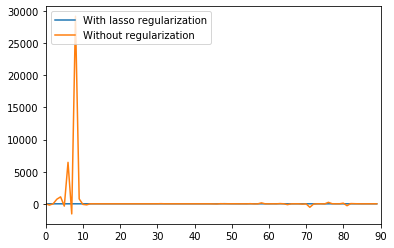

In [496]:
# Plot the graph here

### BEGIN SOLUTION
coef_no_reg = lr.coef_[0]
coef_with_reg = reg.coef_
# plt.plot(coef_no_reg, coef_with_reg)
plt.plot(coef_with_reg)
plt.plot(coef_no_reg)

plt.axis(xmin = 0, xmax = len(coef_no_reg))
plt.legend(['With lasso regularization', 'Without regularization'], loc = 'upper left')
### END SOLUTION

<span style="color:blue">**The coefficients of the features have been minimized, leaving an almost straight line compared to the magnitude of coefficients without regularization. **</span>

## Part 6: Categorical features [3 pts]

Load again the entire dataset, without selecting specific features as you did in Part 1. The dataset now contains both *numerical* and *categorical* features.

In [537]:
df = pd.read_csv(csv_path, sep=',', header = 0,
                )

y = df['nonViolPerPop'].values.reshape(-1,1)
df.dropna(subset=['nonViolPerPop'],axis=0, inplace=True)


### Question 6a:
Look at the description of the features. Which of the features are or should be treated as categorical? Add the column names in a list.

In [538]:
### BEGIN SOLUTION

categorical_features = ['State', 'countyCode']

### END SOLUTION

### Question 6b [Research]:
Impute values using the median, on the entire dataset (regardless of train/test split). 
Does it make sense to impute values for all missing features? If yes, do so. Otherwise explain and drop rows containing missing values you can't replace.

Hint: If you want to impute missing values only for some specific columns, you can refer to this link: https://stackoverflow.com/questions/38584184/imputer-on-some-dataframe-columns-in-python

In [539]:
### BEGIN SOLUTION
df_categorical = df[categorical_features]
df.drop(categorical_features, axis=1, inplace=True)
imp = SimpleImputer(missing_values=np.nan, strategy="median" )
df=imp.fit_transform(df)
display(df)
X = df.copy()
### END SOLUTION

array([[3.10000e+00, 2.14400e+01, 1.13300e+01, ..., 1.39459e+03,
        7.51220e+04, 1.19800e+04],
       [2.82000e+00, 2.13000e+01, 1.71800e+01, ..., 1.95595e+03,
        3.68595e+04, 2.31230e+04],
       [2.76000e+00, 4.05300e+01, 1.26500e+01, ..., 9.98879e+03,
        3.68595e+04, 2.06590e+04],
       ...,
       [2.54000e+00, 2.77200e+01, 1.33900e+01, ..., 5.14494e+03,
        3.57230e+04, 2.06590e+04],
       [2.56000e+00, 2.40300e+01, 1.29900e+01, ..., 3.81793e+03,
        2.24070e+04, 1.31310e+04],
       [2.57000e+00, 2.49000e+01, 1.53300e+01, ..., 1.99298e+03,
        3.76640e+04, 1.05670e+04]])

<span style="color:blue">**No, it does not make sense to impute values for categorical features since there is no mean or median 'State' or 'countyCode' and this would not be helpful in a case like this. **</span>

### Question 6c:
Have another look at the data, specifically the two new added features. Do you consider them useful/meaningful predictors for a (linear) Logistic Regression model? Explain.

Can you think of doing something that can help a linear model take advantage of some additional information? If so, implement your solution.


In [540]:
### BEGIN SOLUTION
df_categorical['countyCode'] = df_categorical['State'] + (df_categorical['countyCode'].apply(str))

### END SOLUTION

<span style="color:blue">**Yes, the states indicate a region within the country, which could affect the crime rate. This also counts for the county codes, which are a specific region within a state. For this reason we decided to make the county codes unique for a region by altering the column to [<State>+<countyCode>]. This way we can use the specific regions to train our model and make predictions for other data points within that particular region. If for example in a certain city the crime rate is high, then another place (close that city) with the same state +  county code combination is also likely to have a higher crime rate. This could be predicted through the state + county code identifier, which we created. 
**</span>

### Question 6d:
One hot encode the categorical features, then merge them back into the original dataframe/array.

In [541]:
### BEGIN SOLUTION
from sklearn.preprocessing import OneHotEncoder
df_categorical['countyCode'] = df_categorical['countyCode']
df_categorical = pd.get_dummies(df_categorical).values
df = np.concatenate((df,df_categorical),axis=1)
display(df)

### END SOLUTION

array([[ 3.1 , 21.44, 11.33, ...,  0.  ,  0.  ,  0.  ],
       [ 2.82, 21.3 , 17.18, ...,  0.  ,  0.  ,  0.  ],
       [ 2.76, 40.53, 12.65, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 2.54, 27.72, 13.39, ...,  0.  ,  0.  ,  0.  ],
       [ 2.56, 24.03, 12.99, ...,  0.  ,  0.  ,  0.  ],
       [ 2.57, 24.9 , 15.33, ...,  0.  ,  0.  ,  0.  ]])

### Question 6e:
Follow the instructions in the cell below. Due to randomization of the train_test_split, results might change. Make sure to **run the same code a few times** and understand what is happening.

In [530]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.linear_model import Ridge

# Split the dataset into training, validation and test sets:
# Training set: 10% of the entire set
# Make the remaining 10% a validation dataset and the rest a test set.

### BEGIN SOLUTION ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1)

### END SOLUTION ###


# Normalize all features based on the training and validation set combined.

### BEGIN SOLUTION ###
transformer = Normalizer().fit(np.concatenate((X_train, X_val)))
X_train = transformer.transform(X_train)
X_val = transformer.transform(X_val)
X_test = transformer.transform(X_test)
### END SOLUTION ###


# Train a linear regression model on the training and validation set combined. 
# Calculate the error on the training set and the test set.

### BEGIN SOLUTION ###
# train model
lr = LinearRegression().fit(np.concatenate((X_train, X_val)), np.concatenate((y_train, y_val)))
# predict
prediction_train = lr.predict(X_train)
prediction_val = lr.predict(X_val)
prediction_test = lr.predict(X_test)
# calculate rmse
RMSE_train_lr = mean_squared_error(y_train, prediction_train)**0.5
RMSE_val_lr = mean_squared_error(y_val, prediction_val)**0.5
RMSE_test_lr = mean_squared_error(y_test, prediction_test)**0.5
print('Normalized: \nRMSE train: {} \nRMSE val: {} \nRMSE test: {} \n'.format(RMSE_train_lr, RMSE_val_lr, RMSE_test_lr))
### END SOLUTION ###


# Train a regularized model (use Ridge regularization). To decide the parameter alpha, use a range of values to train,
# the model. Test its performance on the validation set. Output the RMSE for different values of alpha, and choose the
# best value.

### BEGIN SOLUTION ###
def train_ridge(alpha):
    # train model
    lr = Ridge(alpha=alpha).fit(X_train, y_train)
    # predict
    prediction_train = lr.predict(X_train)
    prediction_val = lr.predict(X_val)
    # calculate rmse
    RMSE_train = mean_squared_error(y_train, prediction_train)**0.5
    RMSE_val = mean_squared_error(y_val, prediction_val)**0.5
#     RMSE_test = mean_squared_error(y_test, prediction_test)**0.5
    print('Ridge regression with alpha = {}: \nRMSE train: {} \nRMSE val: {} \n'.format(alpha, RMSE_train, RMSE_val))
    return {'RMSE_train': RMSE_train, 'RMSE_val': RMSE_val}

for alpha in [0.0, 1e-15, 1e-8, 0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1, 1.0, 10.0]:
    train_ridge(alpha)
print("The RMSE on the test set is the best for alpha = 1e-8 \n")
### END SOLUTION ###



# Train the regularized model (use Ridge regularization) with the best alpha parameter found above on the traing and 
# validation set combined.

### BEGIN SOLUTION ###
# train model with alpha = 0.1
lr = Ridge(alpha=1e-8).fit(X_train, y_train)

### END SOLUTION ###


# Compare the performance of the linear regression with and without regularization
# predict
prediction_train = lr.predict(X_train)
prediction_val = lr.predict(X_val)
prediction_test = lr.predict(X_test)
# calculate rmse
RMSE_train = mean_squared_error(y_train, prediction_train)**0.5
RMSE_val = mean_squared_error(y_val, prediction_val)**0.5
RMSE_test = mean_squared_error(y_test, prediction_test)**0.5
print("""RMSE train with regularization: {} vs. without regularization: {} \nRMSE val with regularization: {} vs. without regularization: {} \nRMSE test with regularization: {} vs. without regularization: {} \n"""
      .format(RMSE_train, RMSE_train_lr, RMSE_val, RMSE_val_lr, RMSE_test, RMSE_test_lr))


Normalized: 
RMSE train: 707.4057934771213 
RMSE val: 612.7511669481628 
RMSE test: 765.3810616458713 

Ridge regression with alpha = 0.0: 
RMSE train: 655.054041321184 
RMSE val: 916.7243752001393 

Ridge regression with alpha = 1e-15: 
RMSE train: 655.0540413211846 
RMSE val: 916.7243652891342 

Ridge regression with alpha = 1e-08: 
RMSE train: 656.1989321581855 
RMSE val: 899.2235570133371 

Ridge regression with alpha = 1e-05: 
RMSE train: 764.0806523082731 
RMSE val: 865.641090709229 

Ridge regression with alpha = 0.0001: 
RMSE train: 909.6505991533027 
RMSE val: 1140.899775927763 

Ridge regression with alpha = 0.001: 
RMSE train: 981.4875809453073 
RMSE val: 1300.6366949444475 

Ridge regression with alpha = 0.01: 
RMSE train: 994.8110747743674 
RMSE val: 1354.26101715777 

Ridge regression with alpha = 0.05: 
RMSE train: 1020.2806545964797 
RMSE val: 1473.835035198614 

Ridge regression with alpha = 0.1: 
RMSE train: 1071.8997433549168 
RMSE val: 1602.10655525658 

Ridge regre

### Question 6f:
What are your conclusions for the two models compared? Which model should you choose over the two? Is hyperparameter tuning useful in this case?

<span style="color:blue">**After hyperparameter tuning we managed for the ridge regression model to approach the RMSE values for the linear regression model. However the linear model often beats the ridge regression model in this case, and most of the time the two RMSE values are very close bound. In this case we would choose the linear regression model, since most of the times it outperforms the ridge regression model. We have ran the two models many times with different alpha-values for ridge regression, which lead us to choose the alpha-value of 1e-8. Even though this alpha usually seems to score the best for ridge regression, most of the time linear regression outperforms the model.**</span>